In [1]:
import os
from io import open 

"""Writing the data per file into a dictionary for which the key is the category of news"""

import unicodedata
import string

all_letters = string.ascii_letters + ".,;'& "
n_letters = len(all_letters)

def unitoAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

def readFile_byline(filename):
    line_of_news = open("news_data_final/"+filename , encoding = 'utf-8').read().split('\n')    
    return [unitoAscii(line) for line in line_of_news]

In [2]:
category_news = {}
all_categories = []

list_of_files = os.listdir("news_data_final/")

#Dictionary which maps every category of news to it's description
for _file in list_of_files:
    category = _file.split(".")[0]
    all_categories.append(category)
    news_descp = readFile_byline(_file)
    category_news[category] = news_descp

num_categories = len(all_categories)
print(num_categories)

count_of_news_category = {}
average_words_per_number_of_samples = []

#Counting news items per category of news 
for key in category_news.keys():
    item = category_news.get(key)
    number_of_news_items = len(item)
    count_of_news_category[key] = number_of_news_items
    count_of_words = 0
    for sentence in item:
        count_of_words += len(sentence.split(" "))
    average_words_per_number_of_samples.append(count_of_words/number_of_news_items)

#print(count_of_news_category["WELLNESS"])
#print(category_news["CRIME"][0:2])
#print(average_words_per_number_of_samples)

29


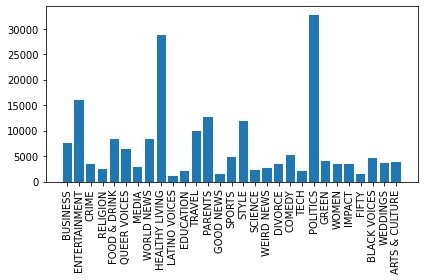

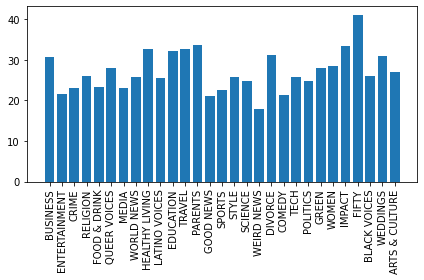

In [3]:
import random
import matplotlib
import matplotlib.pyplot as plt 

path = os.getcwd()
folder = "figs"
FILE = "Number_of_articles_per_category.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

fig = plt.figure()
category = count_of_news_category.keys()
value = count_of_news_category.values()
plt.bar(category, value)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(path_save)
plt.show()

path = os.getcwd()
folder = "figs"
FILE = "Words_per_category.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)



fig1 = plt.figure()
category = count_of_news_category.keys()
value = average_words_per_number_of_samples
plt.bar(category, value)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(path_save)
plt.show()

In [4]:
import torch
import torch.nn as nn 
from torch import optim
import torch.nn.functional as F 

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

def findIndexOfWordInSentence(sentence):
    indexOfWord = {}
    for index, word in enumerate(sentence):
        indexOfWord[word] = index
    return list(indexOfWord.values())

def sentenceToTensor(sentence):
    indexes = findIndexOfWordInSentence(sentence)
    return torch.tensor(indexes , dtype = torch.long, device = device).view(-1, 1)

category_plus_news_list = []

from nltk.corpus import stopwords

for key in category_news.keys():
    for news_item in category_news[key]:
        #news_item = [word for word in news_item.split(" ") if word not in stopwords.words('english')]
        #news_item = " ".join(word for word in news_item)
        category_plus_news_list.append((key, news_item))

print(category_plus_news_list[0])

def pairedTensor(pair):
    #pair is element in category_plus_news_list
    input_tensor = sentenceToTensor(pair[1])
    output_tensor = sentenceToTensor(pair[0])
    return (input_tensor, output_tensor)

#print(pairedTensor(category_plus_news_list[100]))

unique_words = []

'''for pair in category_plus_news_list:
    for word in pair[1].split(" "):
        if word.lower() not in unique_words:
            unique_words.append(word.lower())

print(unique_words[0:50])'''

cuda:0
('BUSINESS', 'U.S. Launches Auto Import Probe, China Vows To Defend Its Interests. The investigation could lead to new U.S. tariffs similar to those imposed on imported steel and aluminum in March.')


'for pair in category_plus_news_list:\n    for word in pair[1].split(" "):\n        if word.lower() not in unique_words:\n            unique_words.append(word.lower())\n\nprint(unique_words[0:50])'

In [5]:
list_of_sentences_business = []
list_of_sentences_politics = []
list_of_sentences_religion = []
list_of_sentences_food = []
list_of_sentences_home = []

list_of_sentences = []

labels =[]
count_of_lables=[]

for pair in category_plus_news_list:
    label = pair[0]
    sentences = pair[1]
    
    if len(sentences.split(" ")) >= 5:
    
        list_of_sentences.append(sentences)
        labels.append(label)
    
#print(list_of_sentences[0:20])
print(len(list_of_sentences))
#print((labels[0:20]))



198123


In [6]:
label_list = list(category_news.keys())
index_class_map_dict1={}

for idx, value in enumerate(label_list):
    index_class_map_dict1[value]=idx

print(index_class_map_dict1)
label_values = list(index_class_map_dict1.values())

{'BUSINESS': 0, 'ENTERTAINMENT': 1, 'CRIME': 2, 'RELIGION': 3, 'FOOD & DRINK': 4, 'QUEER VOICES': 5, 'MEDIA': 6, 'WORLD NEWS': 7, 'HEALTHY LIVING': 8, 'LATINO VOICES': 9, 'EDUCATION': 10, 'TRAVEL': 11, 'PARENTS': 12, 'GOOD NEWS': 13, 'SPORTS': 14, 'STYLE': 15, 'SCIENCE': 16, 'WEIRD NEWS': 17, 'DIVORCE': 18, 'COMEDY': 19, 'TECH': 20, 'POLITICS': 21, 'GREEN': 22, 'WOMEN': 23, 'IMPACT': 24, 'FIFTY': 25, 'BLACK VOICES': 26, 'WEDDINGS': 27, 'ARTS & CULTURE': 28}


In [7]:
number_labels=[]

for label in labels:
    number_labels.append(index_class_map_dict1[label])

In [8]:
import torch
torch.manual_seed(0)

import numpy as np
np.random.seed(0)

import random
random.seed(0)

In [9]:
from sklearn.model_selection import train_test_split

train_texts = list_of_sentences
train_labels = number_labels

train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=.2)


print(len(train_texts))
print(len(train_labels))
print(len(val_texts))

158498
158498
39625


In [10]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

train_encodings = tokenizer(train_texts, return_tensors='pt', truncation=True, padding=True)
val_encodings = tokenizer(val_texts, return_tensors='pt', truncation=True, padding=True)
print(train_encodings.keys())

dict_keys(['input_ids', 'attention_mask'])


In [11]:
class newsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: (val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = newsDataset(train_encodings, train_labels)
#print((train_dataset).__getitem__(3))
val_dataset = newsDataset(val_encodings, val_labels)


In [12]:
from sklearn.metrics import f1_score
import numpy as np

y_pred = np.array([ 4, 13,  6, 13,  5,  2,  2,  6,  6,  6,  2,  6,  6,  2,  2,  6])
y_true = np.array([27, 21,  4, 21,  8, 12,  0,  8,  8, 6,  7,  8, 21, 12, 21, 11])

print(f1_score(y_true, y_pred, average="macro"))


0.020833333333333332


In [13]:
from torch.utils.data import DataLoader
from transformers import DistilBertModel, DistilBertConfig
from transformers.modeling_outputs import SequenceClassifierOutput
from transformers import DistilBertForSequenceClassification, AdamW
from torch.nn import functional as F
import torch.nn
from tqdm import tqdm
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')


class ModDistilBertForSequenceClassification(DistilBertForSequenceClassification):
    
    """Inherited to include a way to output intermediate preclassified output"""

    def forward(
        self,
        input_ids=None,
        attention_mask=None,
        head_mask=None,
        inputs_embeds=None,
        labels=None,
        output_attentions=None,
        output_hidden_states=None,
        return_dict=None,
    ):
        r"""
        labels (:obj:`torch.LongTensor` of shape :obj:`(batch_size,)`, `optional`):
            Labels for computing the sequence classification/regression loss. Indices should be in :obj:`[0, ...,
            config.num_labels - 1]`. If :obj:`config.num_labels == 1` a regression loss is computed (Mean-Square loss),
            If :obj:`config.num_labels > 1` a classification loss is computed (Cross-Entropy).
        """
        return_dict = return_dict if return_dict is not None else self.config.use_return_dict

        distilbert_output = self.distilbert(
            input_ids=input_ids,
            attention_mask=attention_mask,
            head_mask=head_mask,
            inputs_embeds=inputs_embeds,
            output_attentions=output_attentions,
            output_hidden_states=output_hidden_states,
            return_dict=return_dict,
        )
        hidden_state = distilbert_output[0]  # (bs, seq_len, dim)
        pooled_output = hidden_state[:, 0]  # (bs, dim)
        pooled_output = self.pre_classifier(pooled_output)  # (bs, dim)
        pooled_output1 = nn.ReLU()(pooled_output)  # (bs, dim)
        pooled_output1 = self.dropout(pooled_output1)  # (bs, dim)
        logits = self.classifier(pooled_output1)  # (bs, num_labels)

        loss = None
        if labels is not None:
            if self.num_labels == 1:
                loss_fct = nn.MSELoss()
                loss = loss_fct(logits.view(-1), labels.view(-1))
            else:
                loss_fct = nn.CrossEntropyLoss()
                loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))

        if not return_dict:
            output = (logits,) + distilbert_output[1:]
            return ((loss,) + output) if loss is not None else output

        return SequenceClassifierOutput(
            loss=loss,
            logits=logits,
            hidden_states=distilbert_output.hidden_states,
            attentions=distilbert_output.attentions,
        ),pooled_output






In [14]:
model = ModDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased',num_labels = 29)
model.to(device)

no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]
optimizer = AdamW(optimizer_grouped_parameters, lr=1e-5)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=True)

num_of_items_per_class = [7526, 15920, 3361, 2438, 8262, 6137, 2730, 8253, 28464, 1123, 2107, 9826, 12605, 1362, 4693, 11830, 2109, 2611, 3421, 5008, 2078, 32241, 3854, 3459, 3404, 1376, 4463, 3641, 3821]
weights = []
for i in num_of_items_per_class:
    weights.append(1/i)
    
class_weights = torch.FloatTensor(weights).to(device)

train_losses = []
train_acc = []
val_losses = []
val_acc = []
running_loss = 0
running_acc = 0

path = os.getcwd()

folder = "bert_model1"
FILE = "model1.pth"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

checkpoint = torch.load(path_save)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing ModDistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing ModDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ModDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ModDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bi

In [15]:

f1_score_macro = []
f1_score_raw = []
pre_outputs_states = []

pred_temp = 0
true_temp = 0
y_true = []
y_pred = []


all_actual_targets = []
all_top_three_preds = []

pre_outputs_states = []
all_labels = []

model.eval()

for idx, batch in enumerate(val_loader):
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['labels'].to(device)

    outputs, feat_for_tsne = model(input_ids, attention_mask=attention_mask)
    loss = F.cross_entropy(outputs.logits, labels, class_weights)
    running_loss += loss.item()
    
    # Top three predictions for MRR calculation
    values, indices = torch.topk(outputs.logits , 3)
    
    top_three_preds = indices.cpu().detach().numpy()
    actual_targets = labels.cpu().detach().numpy()
    
    for item1 in top_three_preds:
        all_top_three_preds.append(item1)
        
    for item2 in actual_targets:
        all_actual_targets.append(item2)
    
    accuracy = (outputs.logits.argmax(-1) == labels).float().sum()
    running_acc += accuracy.item()

    # predictions for f1 score
    pred_temp = outputs.logits.argmax(-1).cpu().detach().numpy()
    true_temp = labels.cpu().detach().numpy()
        
    for item in pred_temp:
        y_pred.append(item)

    for item in true_temp:
        y_true.append(item)
    
    pre_classified = feat_for_tsne.cpu().detach().numpy()

        
    #for tsne predictions 
    for item in pre_classified:
        pre_outputs_states.append(item)
        
    # ground truth labels
    for item in labels:
        all_labels.append(item)
        
        
                

In [16]:
ranks = [] 

for value in range(len(all_actual_targets)):
    if all_actual_targets[value] == all_top_three_preds[value][0]:
        ranks.append(1)
    elif all_actual_targets[value] == all_top_three_preds[value][1]:
        ranks.append(2)
    elif all_actual_targets[value] == all_top_three_preds[value][2]:
        ranks.append(3)
    else:
        ranks.append(0)

def meanReciprocalRank(arrayOfRanks):
    _sum = 0
    for i in arrayOfRanks:
        
        if i != 0:
            _sum += 1/i
        else:
            _sum += i
            
    return _sum/len(arrayOfRanks)


def accuracy(predicted, target):
    count = 0
    for i in range(len(predicted)):
        
        if predicted[i][0] == target[i]:
            count +=1
            
    return count/len(predicted)


def accuracyTop3(predicted, target):
    count = 0
    for i in range(len(predicted)):
        
        if predicted[i][0] == target[i] or predicted[i][1] == target[i] or predicted[i][2] == target[i]:
            count +=1
            
    return count/len(predicted)
        

In [17]:
print("val_loss for epoch = {epoch}".format(epoch = epoch), "is", running_loss/len(val_loader))
val_losses.append(running_loss/len(val_loader))
running_loss = 0
print("val_acc for epoch = {epoch}".format(epoch = epoch), "is", running_acc/len(val_texts))
val_acc.append(running_acc/len(val_texts))
running_acc = 0



print("Accuracy for top prediction is :", accuracy(all_top_three_preds, all_actual_targets))
print("Accuracy for top 3 predictions is :", accuracyTop3(all_top_three_preds, all_actual_targets))
print("Mean Reciprocal Rank for top 3 predictions is :" , meanReciprocalRank(ranks))


f1score = f1_score(y_true, y_pred, average="macro")
f1score_none = f1_score(y_true, y_pred, average=None)

print("F1 macro score for epoch = {epoch}".format(epoch = epoch), "is", f1score)
print("F1 raw score for epoch = {epoch}".format(epoch = epoch), "is", f1score_none)

f1_score_macro.append(f1score)
f1_score_raw.append(f1score_none)

val_loss for epoch = 0 is 1.1745435820744314
val_acc for epoch = 0 is 0.6505741324921136
Accuracy for top prediction is : 0.6505741324921136
Accuracy for top 3 predictions is : 0.8622082018927445
Mean Reciprocal Rank for top 3 predictions is : 0.7458548895898799
F1 macro score for epoch = 0 is 0.5922058294255594
F1 raw score for epoch = 0 is [0.594375   0.67296382 0.62642948 0.56107835 0.81564246 0.73748367
 0.52880922 0.7080891  0.68756121 0.43660131 0.48275862 0.80637696
 0.71655232 0.38082902 0.74734177 0.80191912 0.47906977 0.47269303
 0.80346821 0.50421743 0.52094718 0.71785315 0.58129839 0.35560123
 0.36444008 0.25862069 0.42587601 0.8032345  0.58183796]


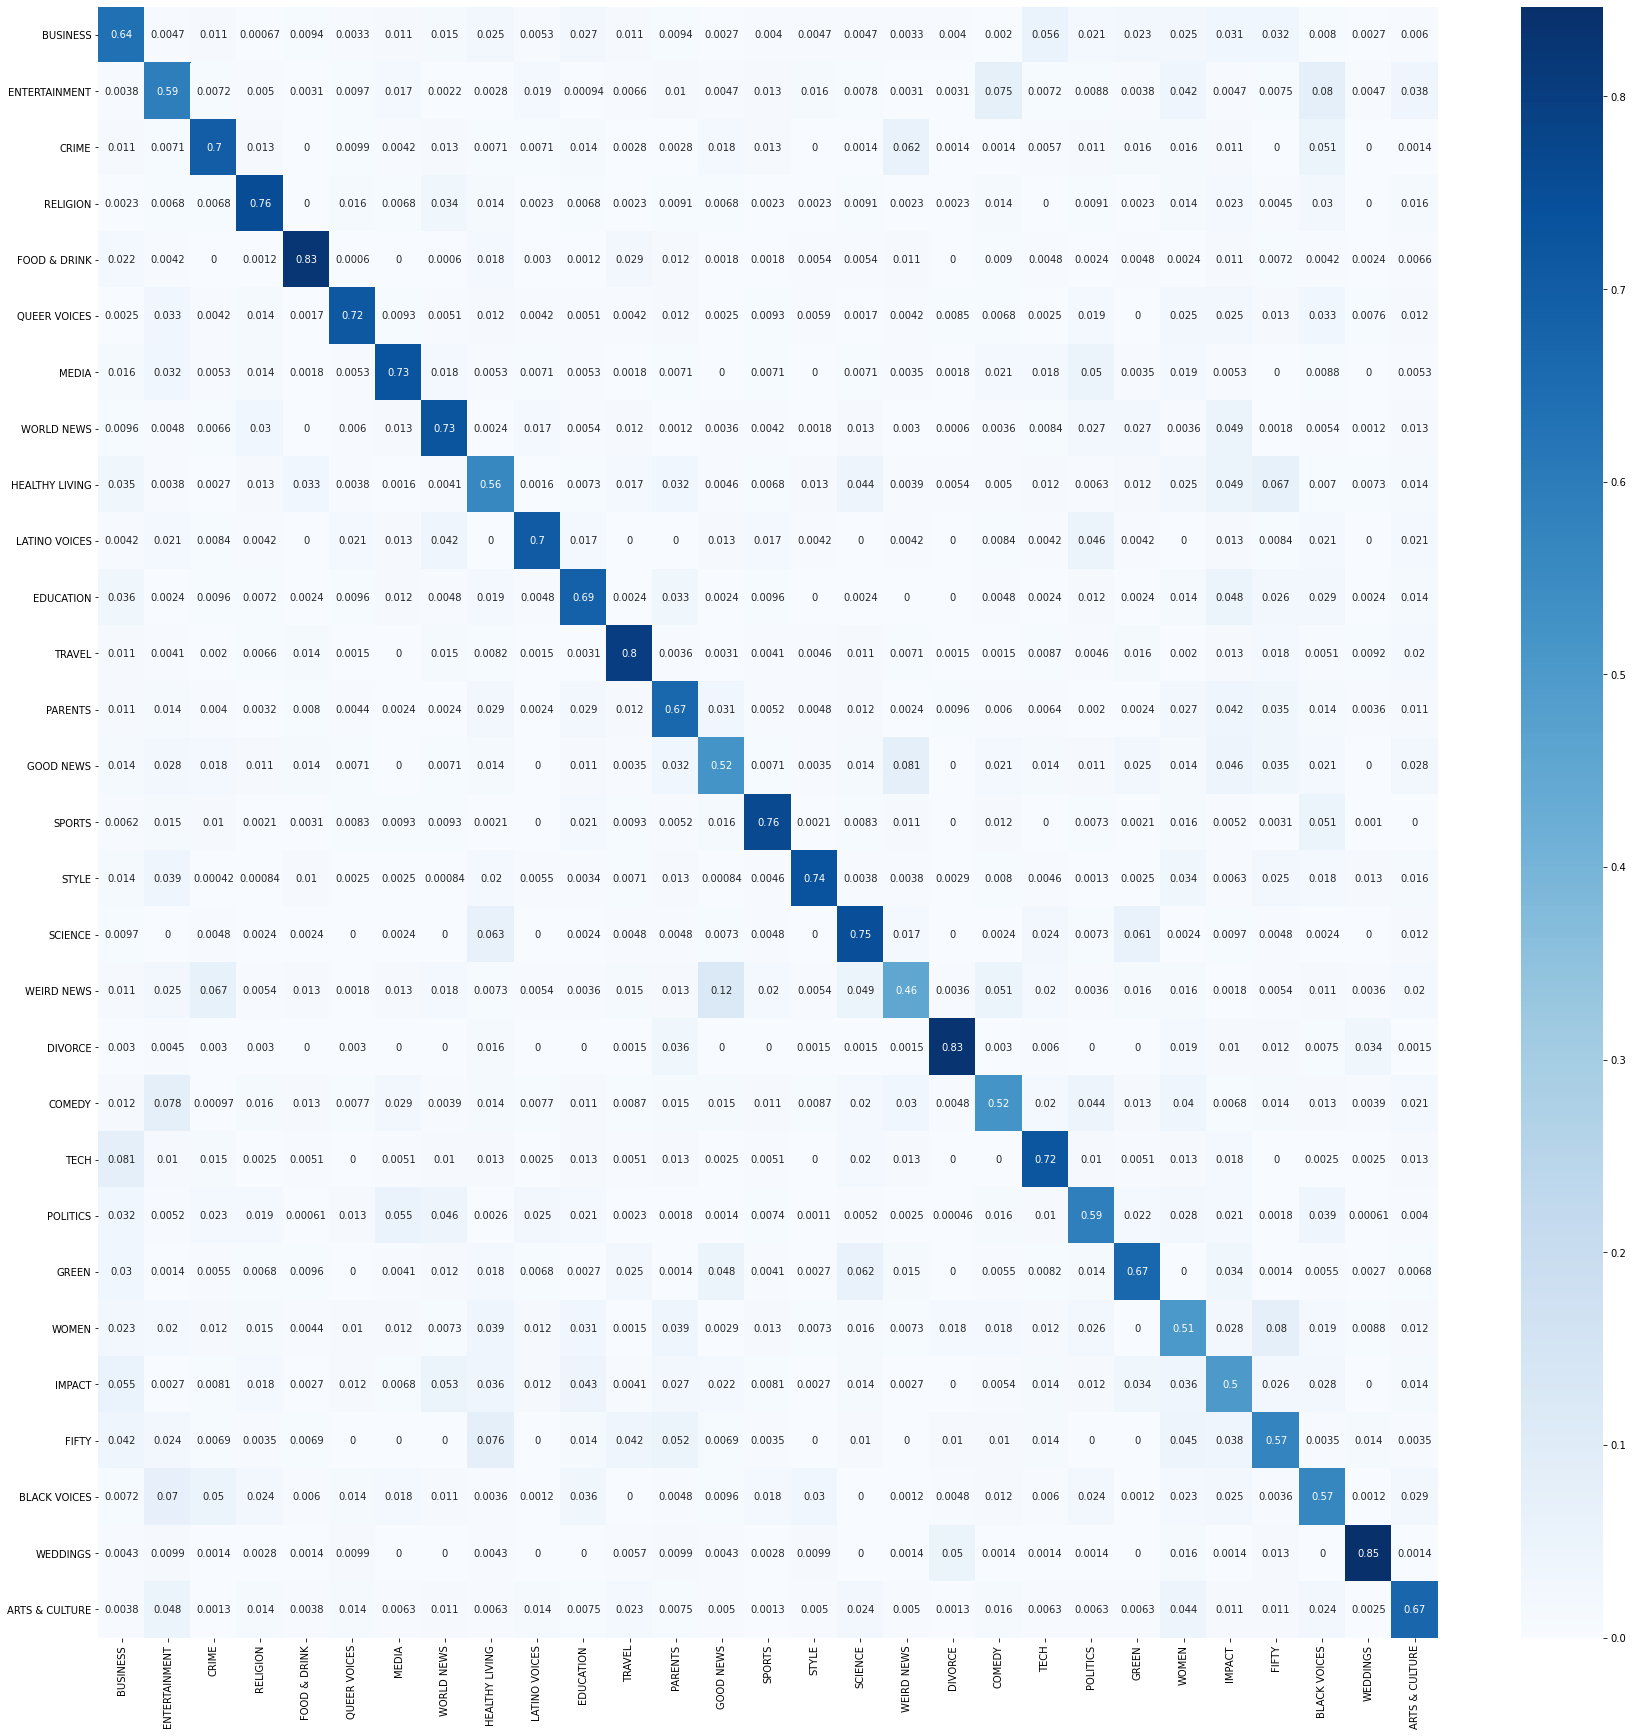

In [18]:
c_matrix = confusion_matrix(y_true, y_pred, labels=label_values, normalize = "true")

import pandas as pd
import seaborn as sns
from pylab import savefig

df_cm = pd.DataFrame(c_matrix, index = label_list,columns = label_list)
plt.rcParams['figure.figsize'] = (30,30)
matrix = sns.heatmap(df_cm, annot=True, cmap='Blues')


In [19]:
all_texts = list_of_sentences
all_labels = number_labels

all_encodings = tokenizer(all_texts, return_tensors='pt', truncation=True, padding=True)


class classHierDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: (val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

full_dataset = classHierDataset(all_encodings, all_labels)
full_dataset_loader = DataLoader(full_dataset, batch_size=16, shuffle=True)


In [20]:
pre_outputs_states = []
all_labels = []

model.eval()

for idx, batch in enumerate(full_dataset_loader):
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['labels'].to(device)

    outputs, feat_for_tsne = model(input_ids, attention_mask=attention_mask)
    pre_classified = feat_for_tsne.cpu().detach().numpy()
    
    #for tsne predictions 
    for item in pre_classified:
        pre_outputs_states.append(item)
        
    # ground truth labels
    for item in labels:
        all_labels.append(item)

In [21]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components = 2, perplexity = 40, n_jobs = -1, random_state = 0).fit_transform(pre_outputs_states)
print(X_embedded.shape)

(198123, 2)


In [27]:
label_list = list(category_news.keys())
index_class_map_dict={}

for idx, value in enumerate(label_list):
    index_class_map_dict[idx]=value
    

target_labels = np.array([tensor.cpu().numpy() for tensor in all_labels])


In [134]:
import pandas as pd

label_list = list(category_news.keys())
index_class_map_dict={}

index_class_map_dict1={}

for idx, value in enumerate(label_list):
    index_class_map_dict1[value]=idx

for idx, value in enumerate(label_list):
    index_class_map_dict[idx]=value
    

df = pd.read_csv('tSNE.csv')

In [135]:
import numpy as np
from scipy.special import rel_entr
#from scipy.stats import wasserstein_distance
from pyemd import emd
from scipy.spatial.distance import jensenshannon
import seaborn as sns
from pylab import savefig

In [136]:
'''df = tsne_data
df['Label'] = np.random.randint(0, 29, size=[len(df)])
print(df.head())'''

"df = tsne_data\ndf['Label'] = np.random.randint(0, 29, size=[len(df)])\nprint(df.head())"

In [127]:
'''df = pd.DataFrame({'X': X_embedded[:, 0], 'Y': X_embedded[:, 1], 'Label': target_labels})
df.to_csv('tSNE.csv', index=False)'''
print(df.head())

           X          Y  Label
0  -3.635986  23.813385     13
1   5.091477 -14.244244     23
2 -20.536127  22.619570     12
3   9.629896  36.884550      8
4  -4.046049 -38.944878     28


In [137]:
from pathlib import Path

save_dir = Path("class-tSNE")
if not save_dir.exists():
    save_dir.mkdir()

hists = []
hist_range = [[df['X'].min(), df['X'].max()], [df['Y'].min(), df['Y'].max()]]
bins = 45
for i in range(29):
    masked = df[df['Label'] == i]
    fig = plt.figure(figsize=(15,15))
    name = index_class_map_dict[i]
    plt.title(name)
    plt.scatter(masked['X'], masked['Y'], 7)
    path_save = save_dir / f"{name}.png"
    fig.savefig(path_save)
    plt.close()
    
    curr_hist = np.histogram2d(masked['X'], masked['Y'], range=hist_range, bins=bins, normed=True)[0]
    hists.append(curr_hist.reshape(-1))
hists = np.array(hists)

In [138]:
#%matplotlib --list

In [139]:
def wass_dist(class1, class2):
    hist1 = hists[class1].reshape(bins, bins)
    hist2 = hists[class2].reshape(bins, bins)
    dists = np.linalg.norm(new_items1 - new_items2, axis=-1)
    return emd(hists[class1].copy(order='C'), hists[class2].copy(order='C'), dists.copy(order='C'))

In [140]:
kl_div = np.empty([29, 29], dtype=np.float64)
js_div = np.empty([29, 29], dtype=np.float64)
was_dist = np.empty([29, 29], dtype=np.float64)
eps = np.finfo(np.float64).eps
for i in range(29):
    for j in range(29):
        kl_div[i, j] = rel_entr(hists[i] + eps, hists[j] + eps).sum()
        js_div[i, j] = jensenshannon(hists[i] + eps, hists[j] + eps).sum()
        was_dist[i, j] = wasserstein_distance(hists[i] + eps, hists[j] + eps).sum()
        #was_dist[i, j] = wass_dist(class_items[i], class_items[j])

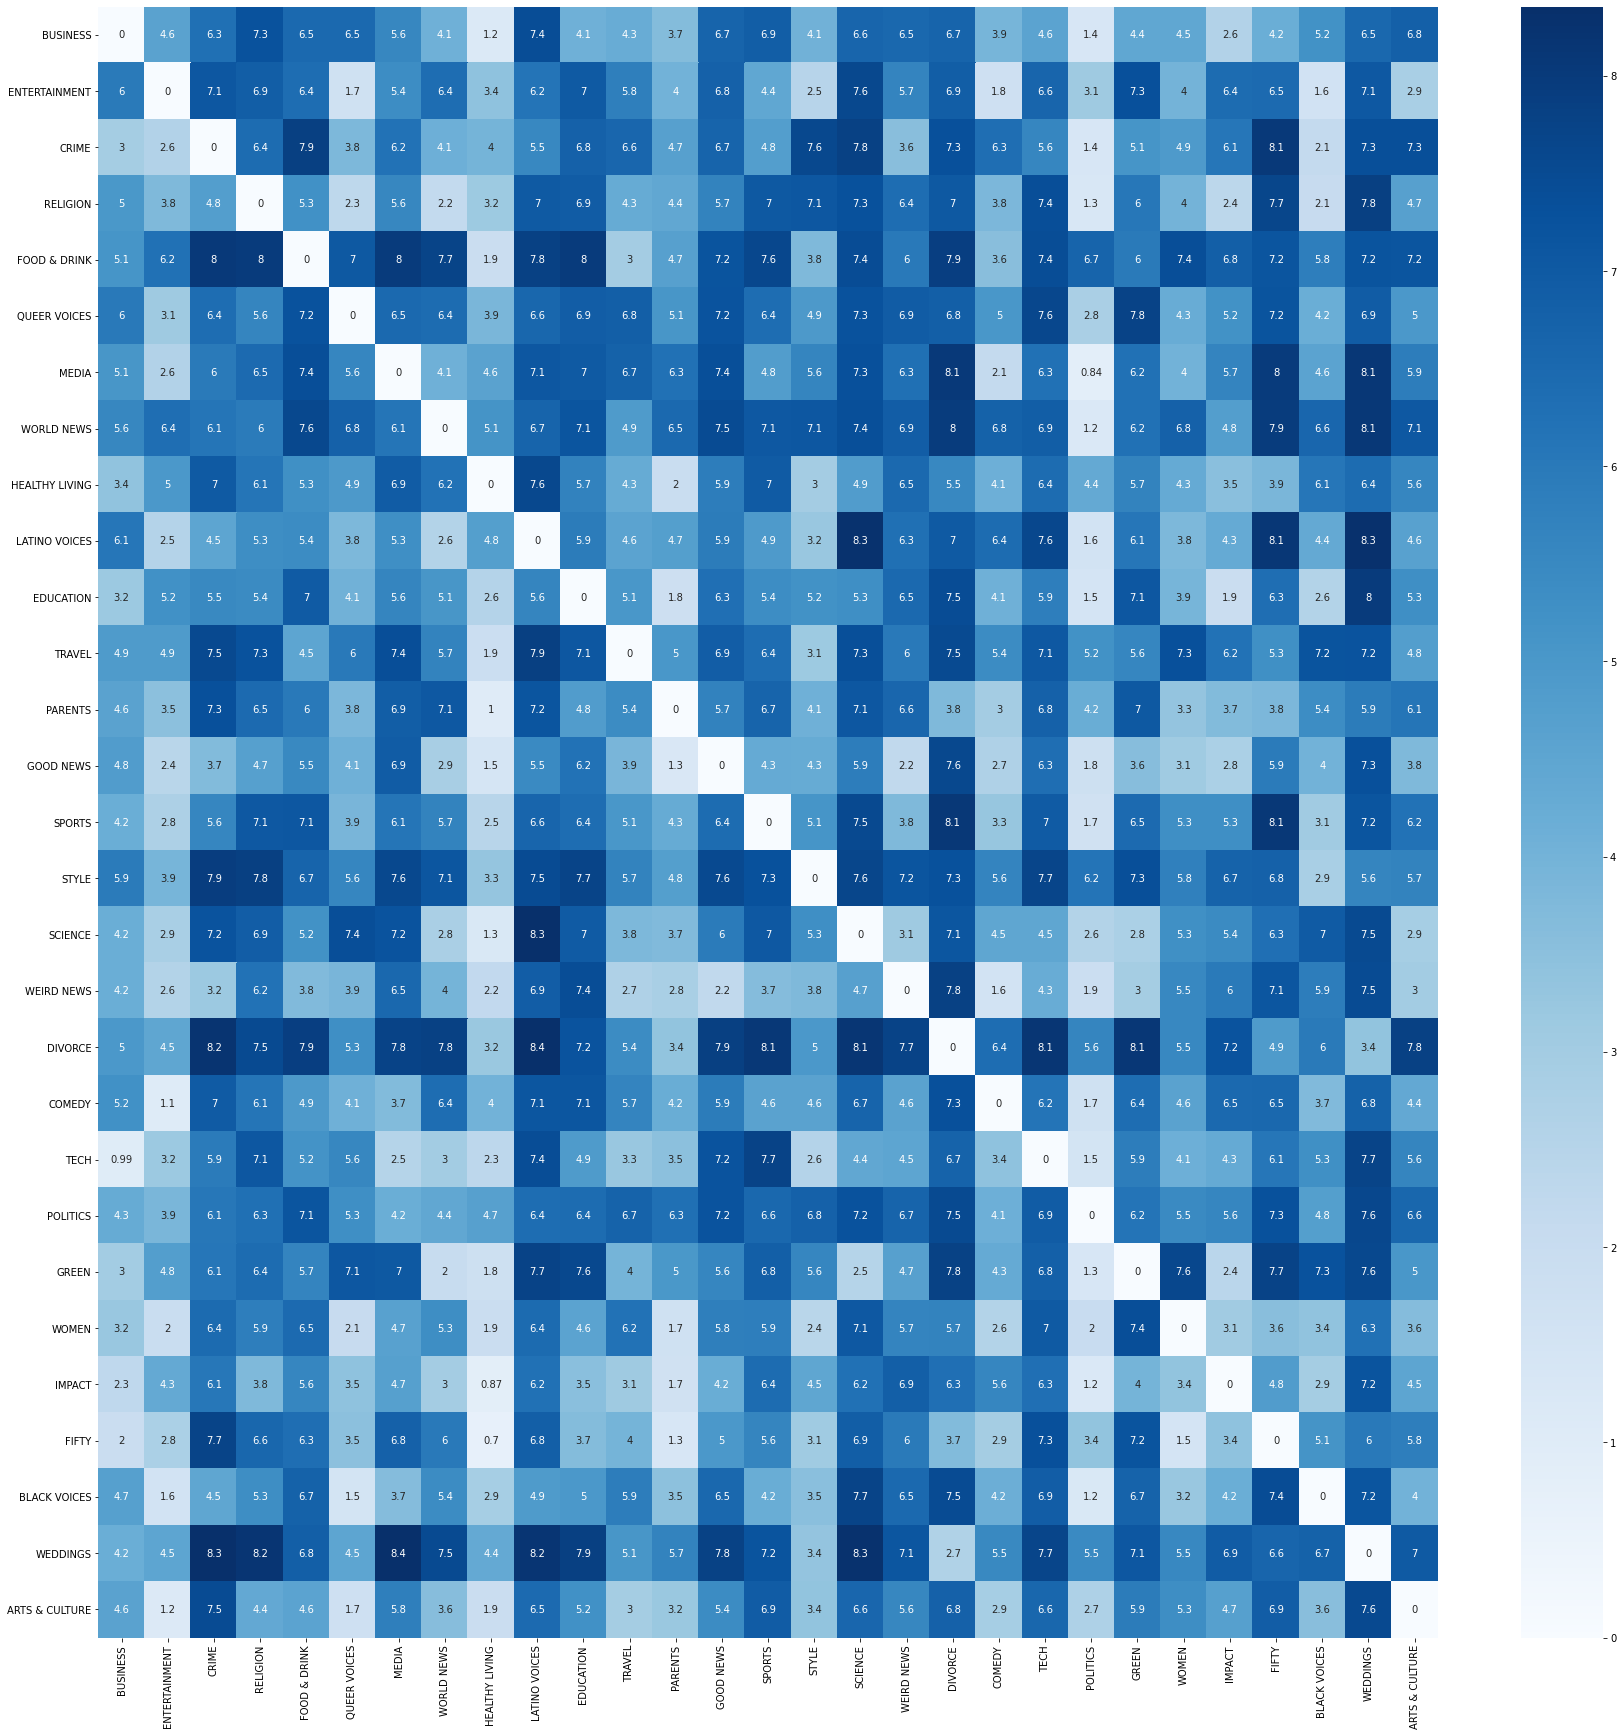

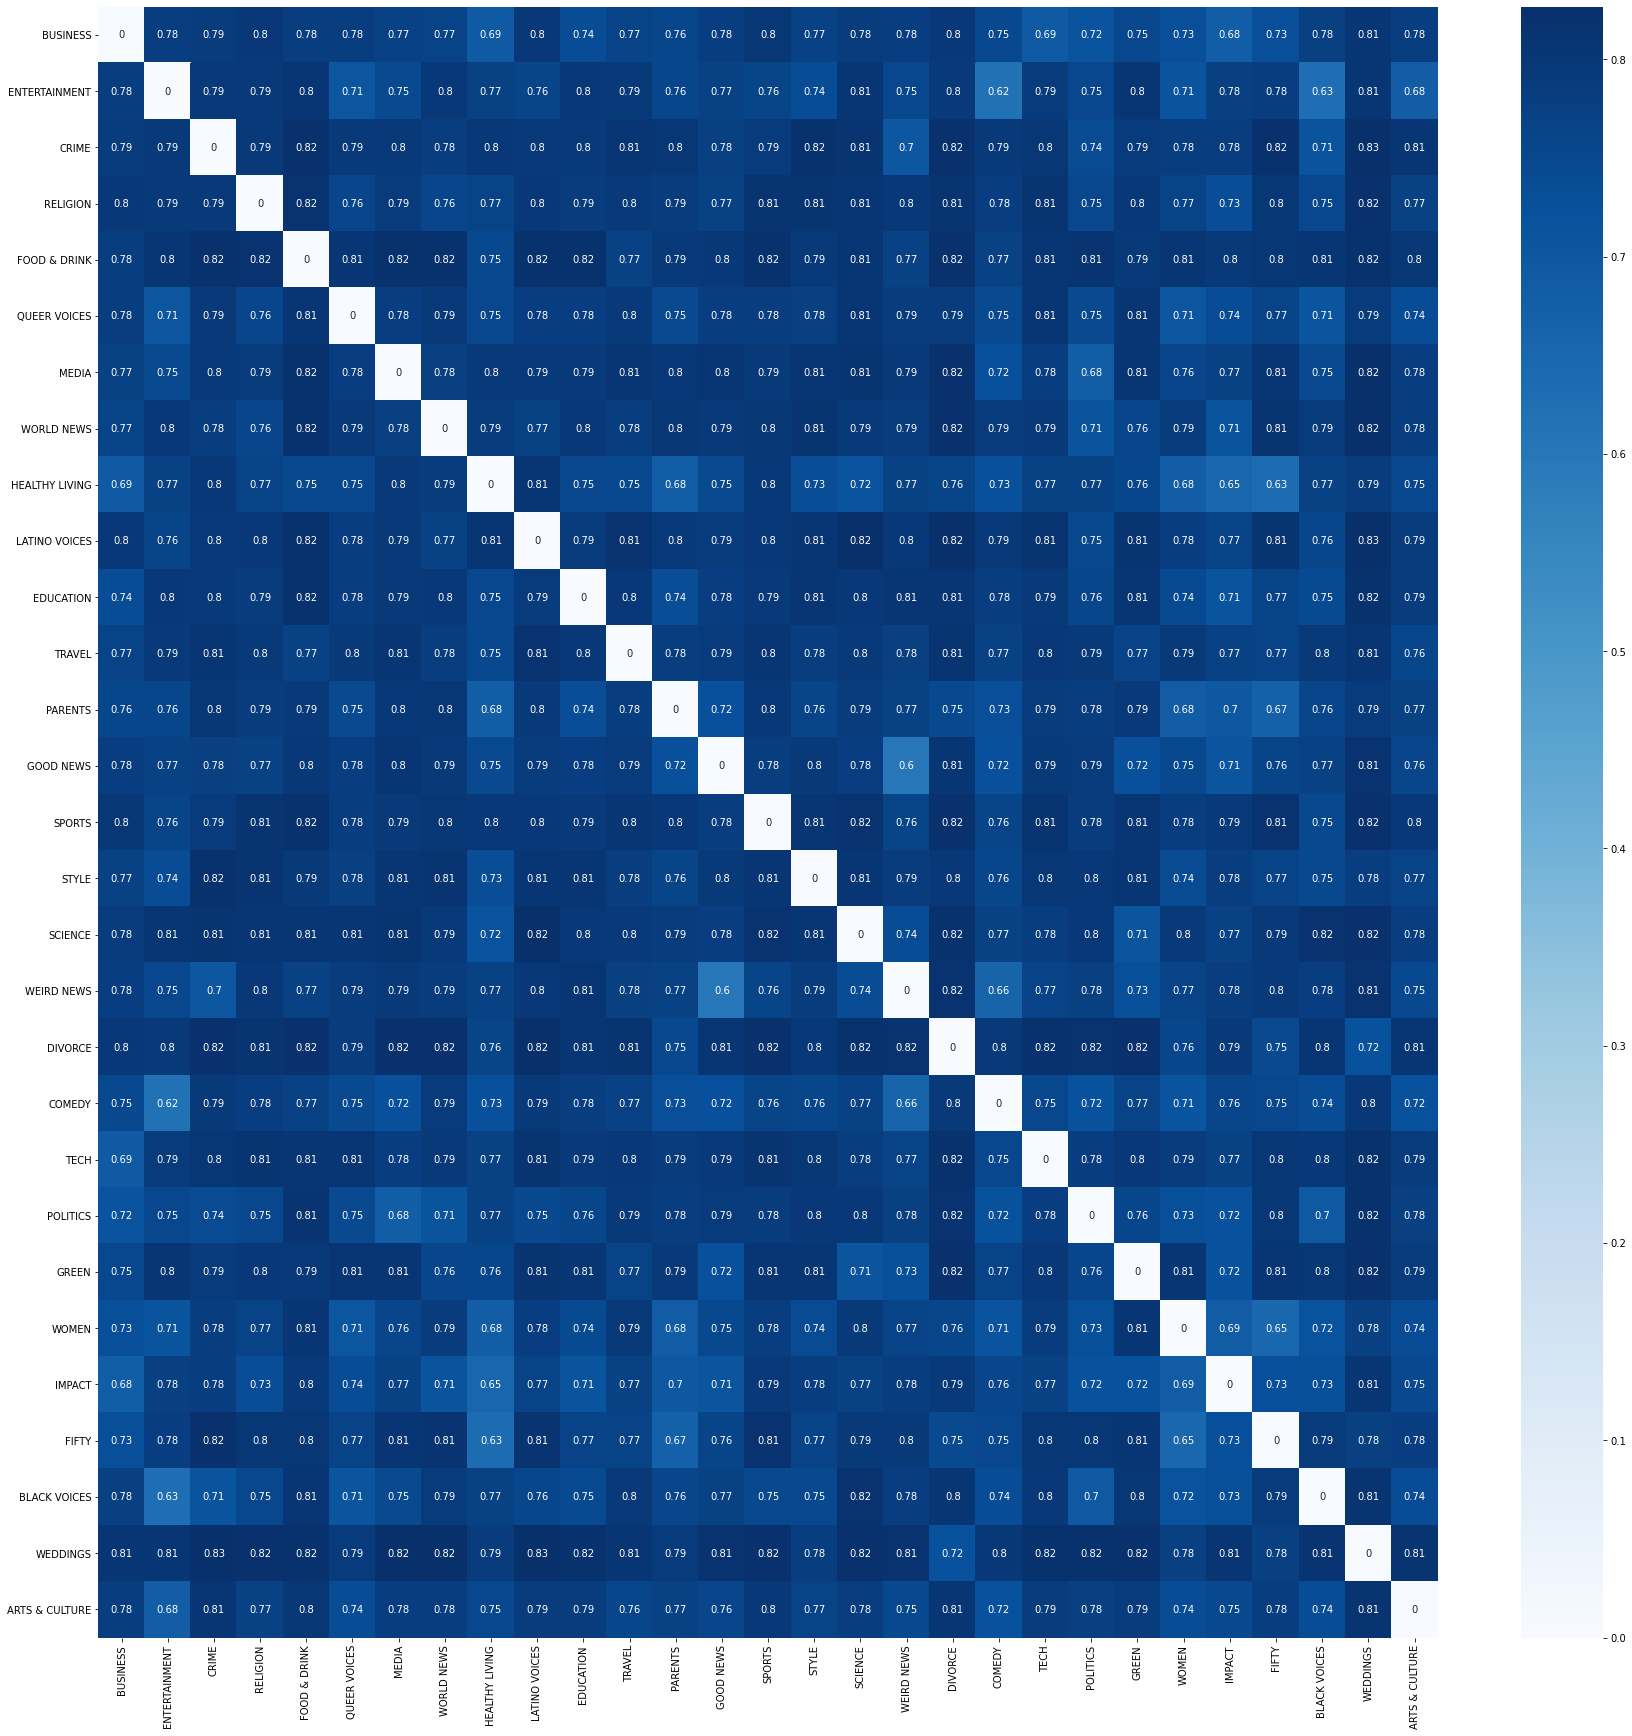

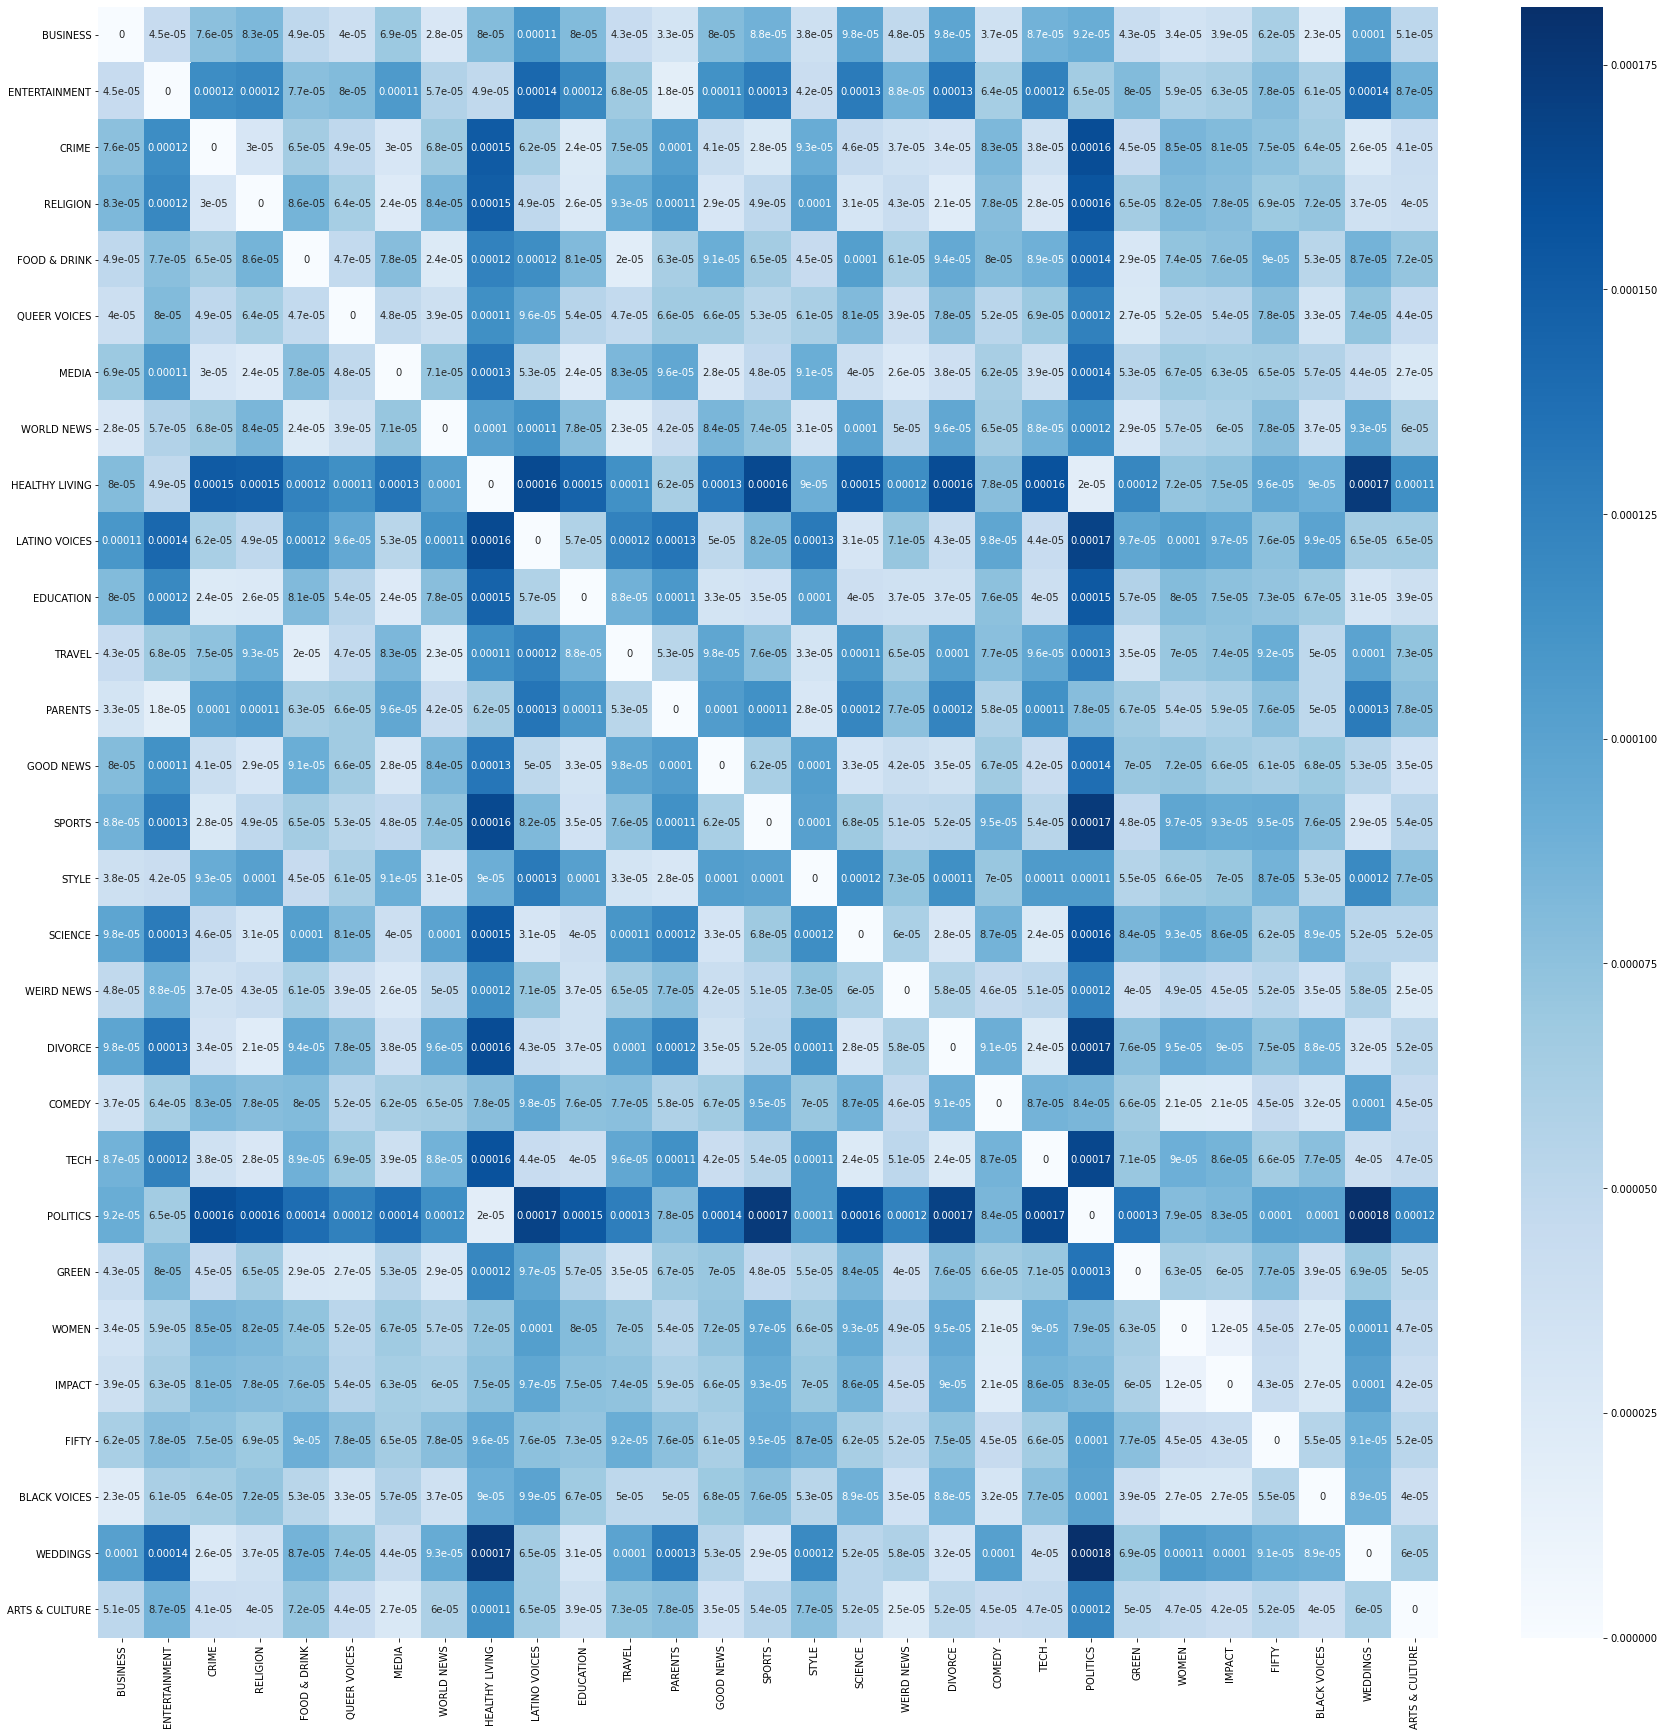

In [141]:
df_kl = pd.DataFrame(kl_div, index = label_list,columns = label_list)
plt.rcParams['figure.figsize'] = (30,30)
matrix = sns.heatmap(df_kl, annot=True, cmap='Blues')

path = os.getcwd()
folder = "figs"
FILE = "kldiv_full.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

figure = matrix.get_figure()    
figure.savefig(path_save)
plt.show()

df_js = pd.DataFrame(js_div, index = label_list,columns = label_list)
plt.rcParams['figure.figsize'] = (30,30)
matrix = sns.heatmap(df_js, annot=True, cmap='Blues')

path = os.getcwd()
folder = "figs"
FILE = "jsdiv_full.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

figure = matrix.get_figure()    
figure.savefig(path_save)
plt.show()

df_was = pd.DataFrame(was_dist, index = label_list,columns = label_list)
plt.rcParams['figure.figsize'] = (30,30)
matrix = sns.heatmap(df_was, annot=True, cmap='Blues')

path = os.getcwd()
folder = "figs"
FILE = "wasdist_full.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

figure = matrix.get_figure()    
figure.savefig(path_save)
plt.show()



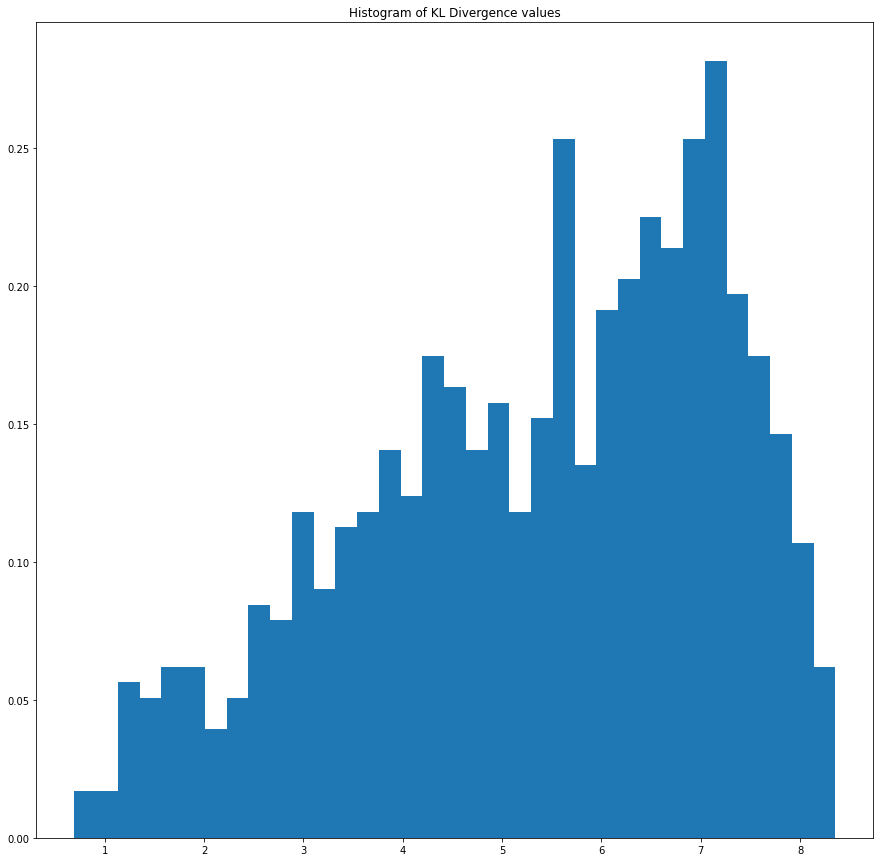

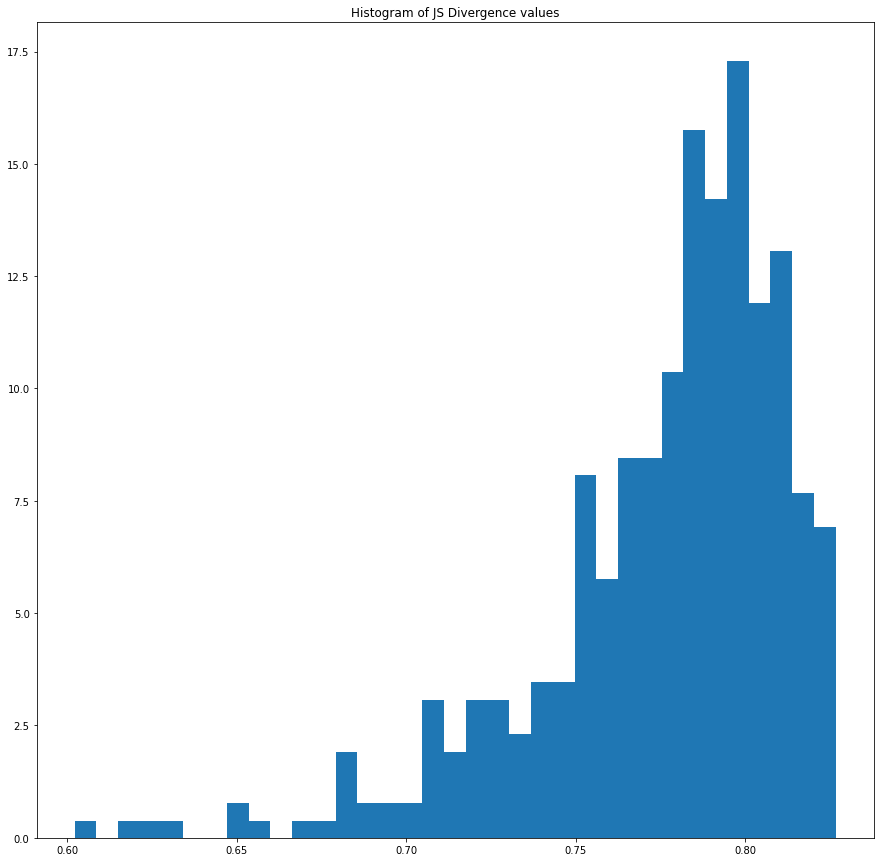

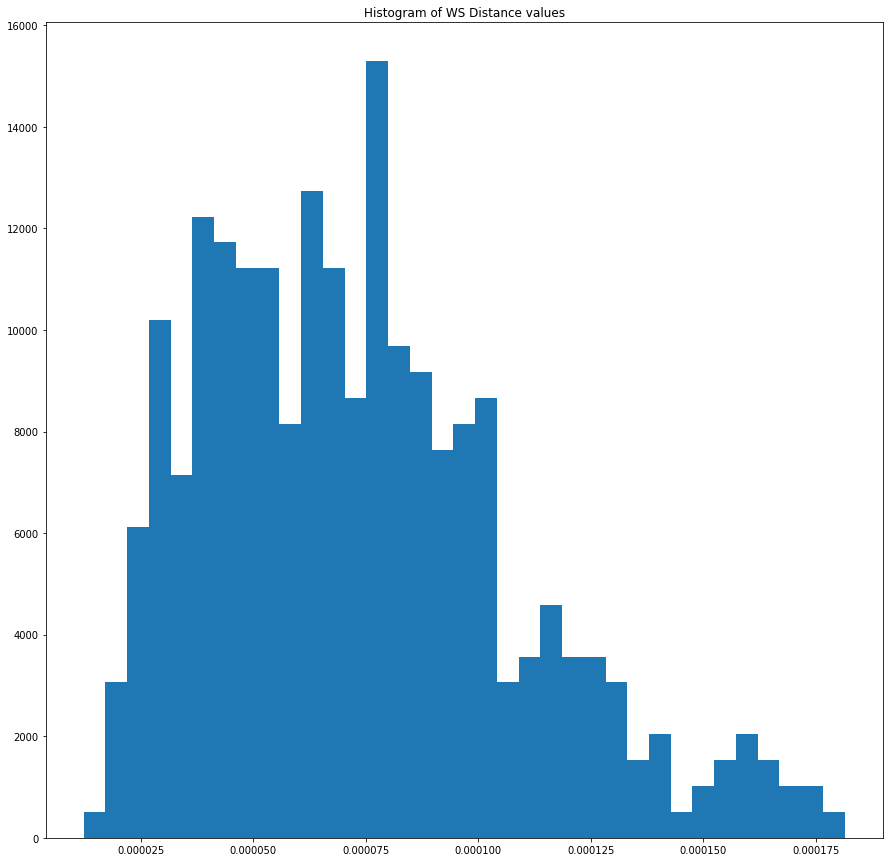

In [142]:
path = os.getcwd()
folder = "figs"
FILE = "kldiv_hist_full.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

fig = plt.figure(figsize=(15,15))
kl_div_new = [kl_div[i, j] for i in range(29) for j in range(29) if i!=j]
plt.hist(kl_div_new, bins=35, density=True)
plt.title("Histogram of KL Divergence values")
plt.savefig(path_save)

FILE = "jenshan_hist_full.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

fig = plt.figure(figsize=(15,15))
js_div_new = [js_div[i, j] for i in range(29) for j in range(29) if i!=j]
plt.hist(js_div_new, bins=35, density=True)
plt.title("Histogram of JS Divergence values")
plt.savefig(path_save)

FILE = "was_dist_hist_full.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

fig = plt.figure(figsize=(15,15))
was_dist_new = [was_dist[i, j] for i in range(29) for j in range(29) if i!=j]
plt.hist(was_dist_new, bins=35, density=True)
plt.title("Histogram of WS Distance values")
plt.savefig(path_save)

In [63]:
from matplotlib.colors import ListedColormap
gen = np.random.default_rng(6)
rgb = gen.uniform(size=(29, 3))
gen.shuffle(rgb)
a = np.ones((29,1))
rgba = np.concatenate([rgb, a], 1)
cmap = ListedColormap(rgba)

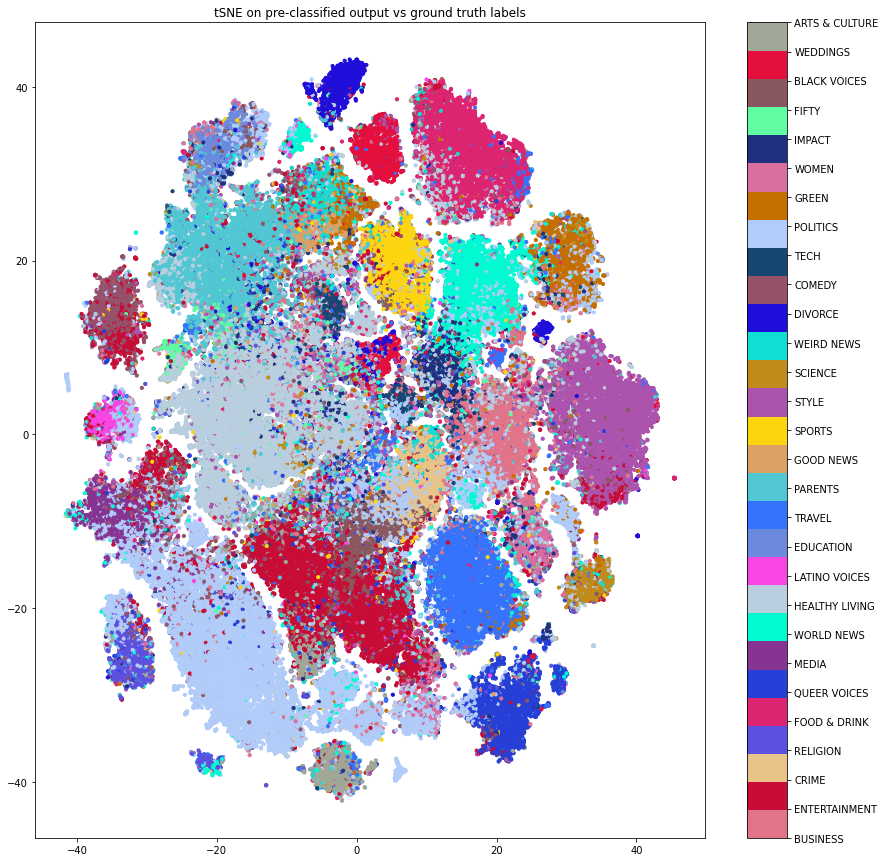

In [64]:
path = os.getcwd()

folder = "newBERT_tSNE_figs"
FILE = "clustered_tSNE.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)


fig = plt.figure(figsize=(15,15))
#cmap = plt.get_cmap('Set3', 29)
out = plt.scatter(df['X'],df['Y'], 10, c = df['Label'], cmap=cmap)
cbar = plt.colorbar(out, ticks = np.arange(29))
cbar.set_ticklabels(list(index_class_map_dict1.keys()))
plt.title("tSNE on pre-classified output vs ground truth labels")
#file_name = path_save

#plt.savefig(file_name)
plt.show()



In [ ]:
path = os.getcwd()

folder = "newBERT_tSNE_figs"
FILE = "clustered_tSNE_fulldataset_oneepoch.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)


fig = plt.figure(figsize=(15,15))
#cmap = plt.get_cmap('Set3', 29)
out = plt.scatter(df['X'],df['Y'], 10, c = df['Label'], cmap=cmap)
cbar = plt.colorbar(out, ticks = np.arange(29))
cbar.set_ticklabels(list(index_class_map_dict1.keys()))
plt.title("tSNE on pre-classified output vs ground truth labels")
file_name = path_save

plt.savefig(file_name)
plt.show()


In [ ]:
label_list = list(category_news.keys())
index_class_map_dict={}

for idx, value in enumerate(label_list):
    index_class_map_dict[idx]=value
    

target_labels = np.asarray(all_labels)

politics_embeddings = []
black_voices_embeddings = [] 
world_news_embeddings = []

comedy_embeddings = []
entertainment_embeddings = []
healthy_living_embeddings = []

food_and_drink_embeddings = []
women_embeddings = []
fifty_embeddings = []

science_embeddings = []


print(index_class_map_dict1)

for idx, val in enumerate(target_labels):
    
    # politics class
    if val == 21:
        politics_embeddings.append(X_embedded[idx])
        
    # black voices     
    if val == 26:
        black_voices_embeddings.append(X_embedded[idx])
        
    # world news      
    if val == 7:
        world_news_embeddings.append(X_embedded[idx])
        
    # comdedy
    if val == 19:
        comedy_embeddings.append(X_embedded[idx])
        
    # entertainment    
    if val == 1:
        entertainment_embeddings.append(X_embedded[idx])
        
    # healthy living     
    if val == 8:
        healthy_living_embeddings.append(X_embedded[idx])
        
    # food and drink
    if val == 4:
        food_and_drink_embeddings.append(X_embedded[idx])
    
    # women 
    if val == 23:
        women_embeddings.append(X_embedded[idx])
    
    # fifty 
    if val == 25:
        fifty_embeddings.append(X_embedded[idx])
        
    # science 
    if val == 16:
        science_embeddings.append(X_embedded[idx])
    

politics means [[ -9.12888467 -15.58274301]]
politics covariance [[[311.95434938  69.4445145 ]
  [ 69.4445145  287.32458181]]]
world news means [[12.47241539 11.66395069]]
world news covariances [[[175.09916188  73.73907616]
  [ 73.73907616 229.16412035]]]
black voices means [[-0.31152383 -7.60466576]]
black voices covariance [[[147.8885567  -11.26415685]
  [-11.26415685 204.81007004]]]


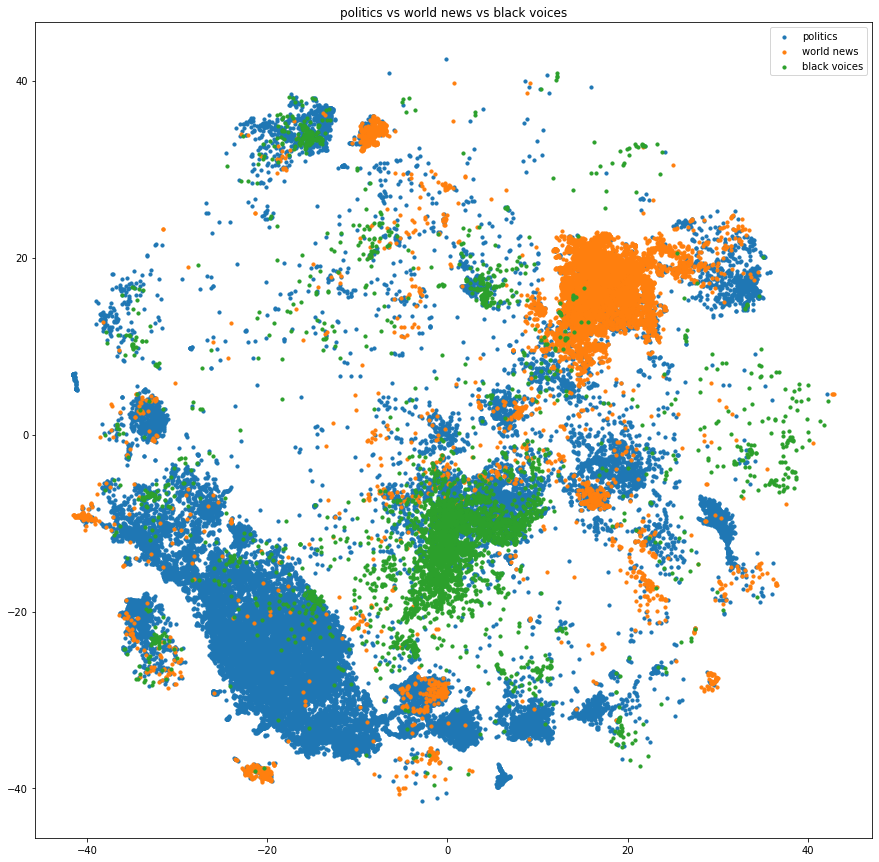

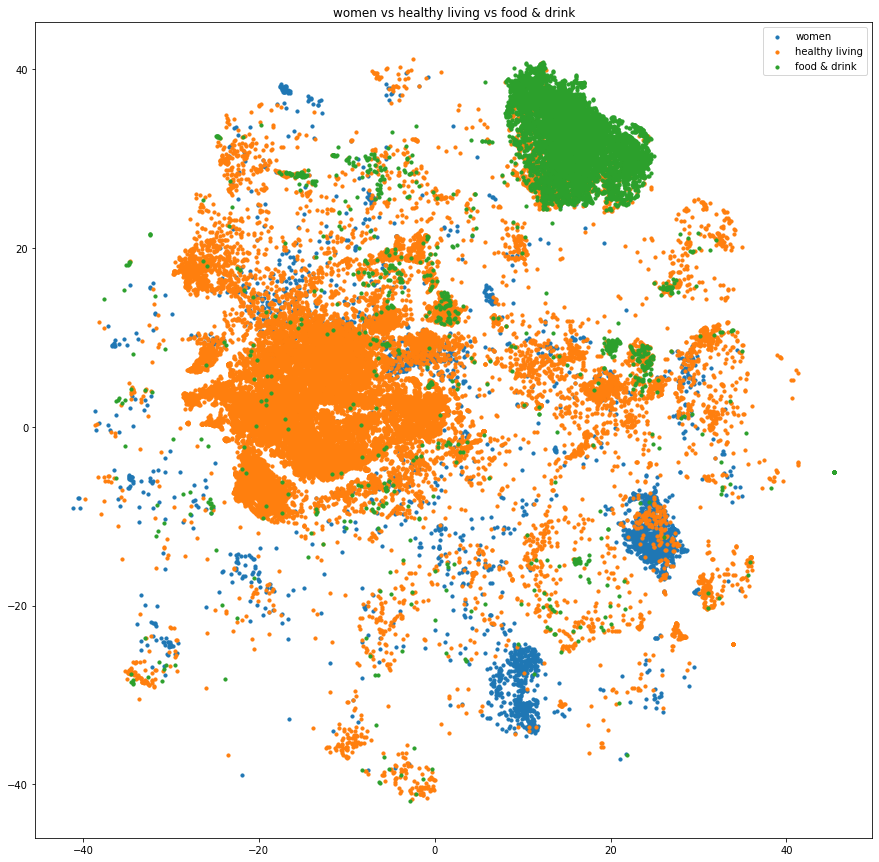

comedy means [[-20.21734779   7.97524698]]
comedy covariances [[[316.44459991 -40.43320754]
  [-40.43320754 225.44229797]]]
entertainment means [[ -4.81871855 -13.21219713]]
entertainment covariances [[[207.83303149 -67.52197703]
  [-67.52197703 164.12051927]]]


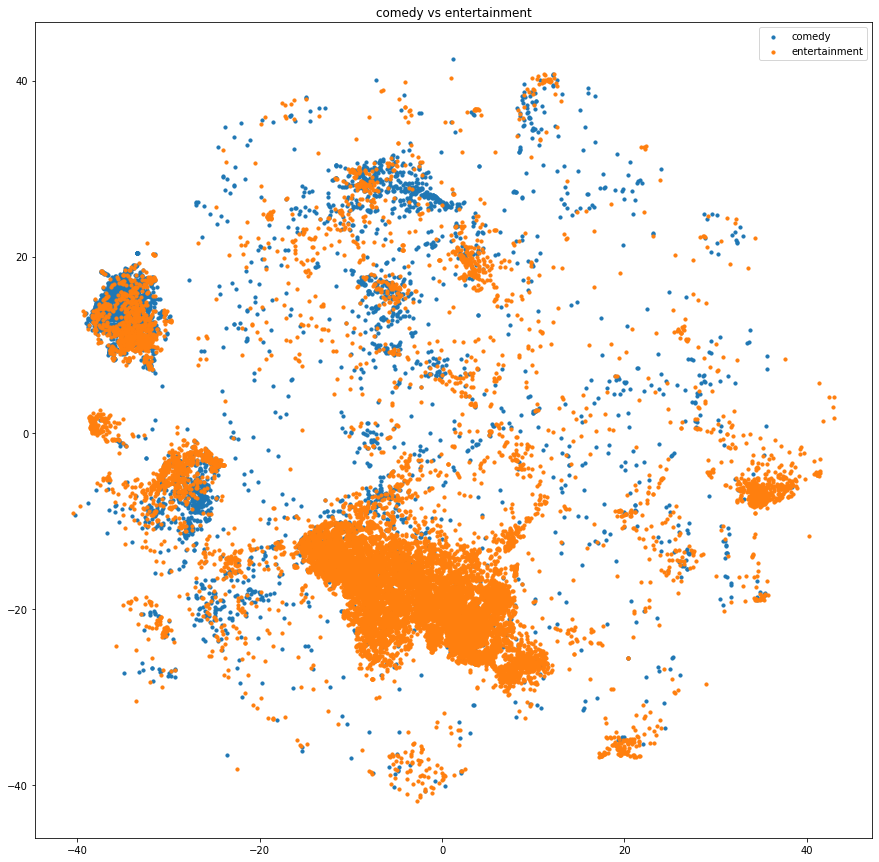

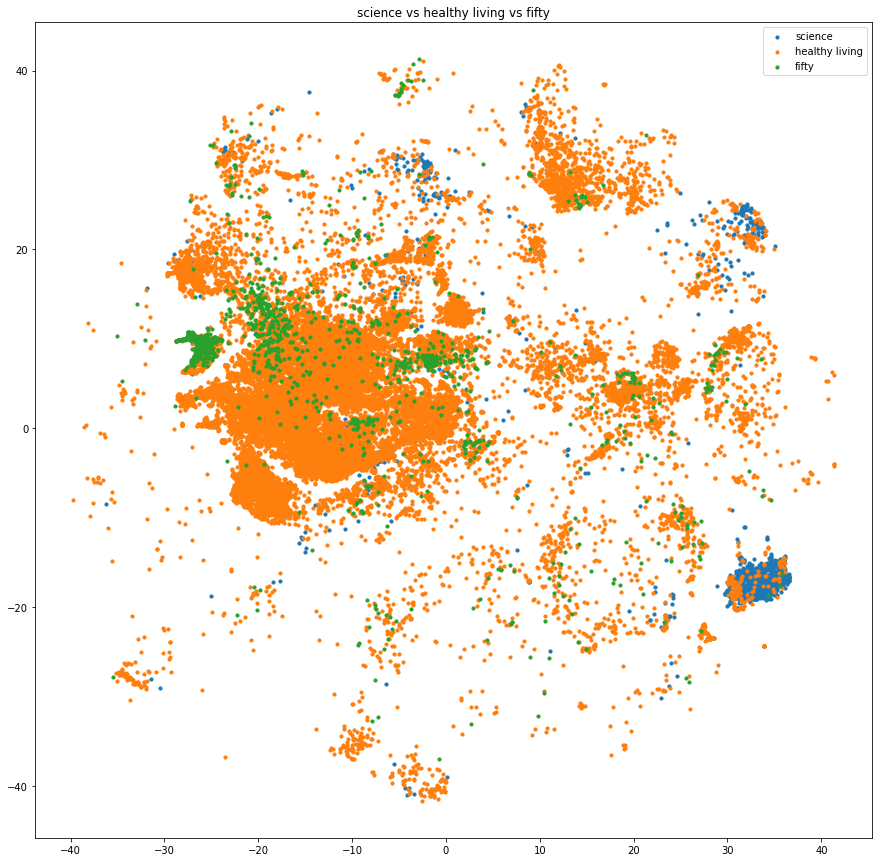

In [68]:
from numpy import exp, loadtxt, pi, sqrt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
import numpy as np
from sklearn.mixture import GaussianMixture

path = os.getcwd()

folder = "newBERT_tSNE_figs"

fig = plt.figure(figsize=(15,15))

x = np.asarray(politics_embeddings)
gm_p = GaussianMixture(n_components=1, random_state=0).fit(x)
out = plt.scatter(x[:,0],x[:,1], 10)
print("politics means", gm_p.means_)
print("politics covariance", gm_p.covariances_)

x1 = np.asarray(world_news_embeddings)
gm_wn = GaussianMixture(n_components=1, random_state=0).fit(x1)
out = plt.scatter(x1[:,0],x1[:,1], 10)
print("world news means",gm_wn.means_)
print("world news covariances",gm_wn.covariances_)

x2 = np.asarray(black_voices_embeddings)
gm_bv = GaussianMixture(n_components=1, random_state=0).fit(x2)
out = plt.scatter(x2[:,0],x2[:,1], 10)
print("black voices means", gm_bv.means_)
print("black voices covariance", gm_bv.covariances_)
                                       
plt.title("politics vs world news vs black voices")
plt.legend(["politics","world news", "black voices"])

FILE = "politics vs world news vs black voices.png"
path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

file_name = path_save
plt.savefig(file_name)
plt.show()



fig = plt.figure(figsize=(15,15))

x = np.asarray(women_embeddings)
gm_w = GaussianMixture(n_components=1, random_state=0).fit(x)
out = plt.scatter(x[:,0],x[:,1], 10)

x1 = np.asarray(healthy_living_embeddings)
gm_hl = GaussianMixture(n_components=1, random_state=0).fit(x1)
out = plt.scatter(x1[:,0],x1[:,1], 10)

x2 = np.asarray(food_and_drink_embeddings)
gm_fd = GaussianMixture(n_components=1, random_state=0).fit(x2)
out = plt.scatter(x2[:,0],x2[:,1], 10)
                                       
plt.title("women vs healthy living vs food & drink")
plt.legend(["women","healthy living", "food & drink"])

FILE = "women vs healthy living vs food & drink.png"
path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

file_name = path_save
plt.savefig(file_name)
plt.show()



fig = plt.figure(figsize=(15,15))

x = np.asarray(comedy_embeddings)
gm_c = GaussianMixture(n_components=1, random_state=0).fit(x)
out = plt.scatter(x[:,0],x[:,1], 10)
print("comedy means",gm_c.means_)
print("comedy covariances",gm_c.covariances_)

x1 = np.asarray(entertainment_embeddings)
gm_e = GaussianMixture(n_components=1, random_state=0).fit(x1)
out = plt.scatter(x1[:,0],x1[:,1], 10)
print("entertainment means", gm_e.means_)
print("entertainment covariances", gm_e.covariances_)

                                       
plt.title("comedy vs entertainment")
plt.legend(["comedy","entertainment"])


FILE = "comedy vs entertainment.png"
path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

file_name = path_save
plt.savefig(file_name)
plt.show()


fig = plt.figure(figsize=(15,15))

x = np.asarray(science_embeddings)
gm_s = GaussianMixture(n_components=1, random_state=0).fit(x)
out = plt.scatter(x[:,0],x[:,1], 10)

x1 = np.asarray(healthy_living_embeddings)
gm_hl = GaussianMixture(n_components=1, random_state=0).fit(x1)
out = plt.scatter(x1[:,0],x1[:,1], 10)

x2 = np.asarray(fifty_embeddings)
gm_fif = GaussianMixture(n_components=1, random_state=0).fit(x2)
out = plt.scatter(x2[:,0],x2[:,1], 10)
                                       
plt.title("science vs healthy living vs fifty")
plt.legend(["science","healthy living", "fifty"])

FILE = "science vs healthy living vs fifty.png"
path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

file_name = path_save
plt.savefig(file_name)
plt.show()


In [78]:
from scipy.stats import wasserstein_distance

x = np.asarray(comedy_embeddings)
x1 = np.asarray(entertainment_embeddings)

print(x.shape)
print(x1.shape)


(5008, 2)
(15920, 2)


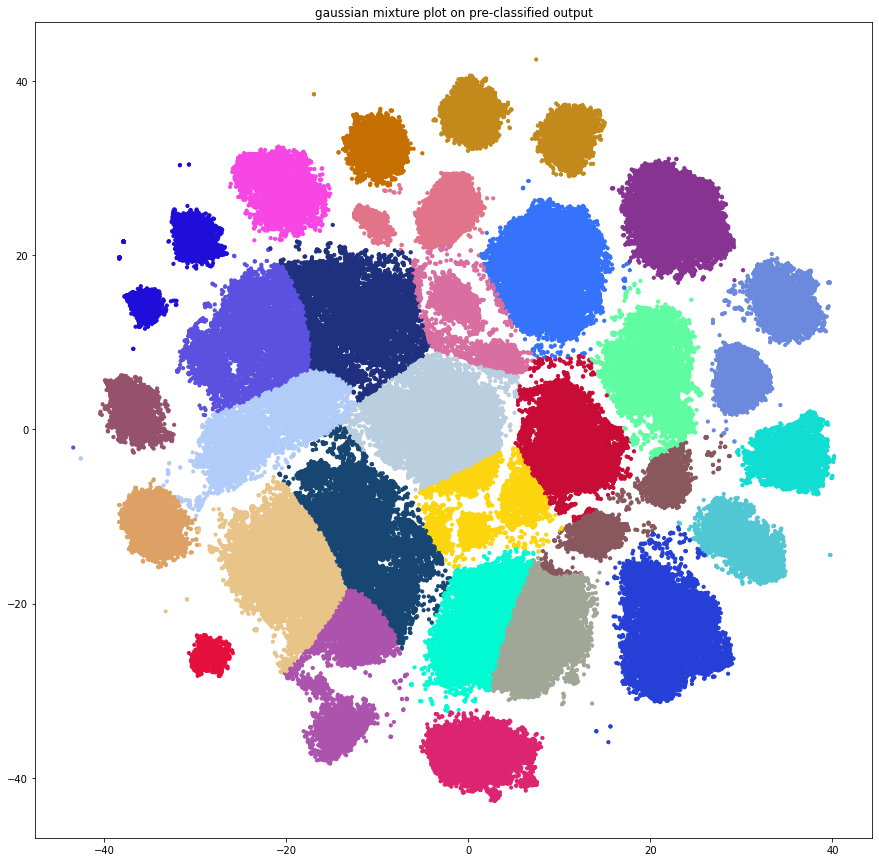

In [34]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=29, random_state=0).fit(X_embedded)
g_labels = gmm.predict(X_embedded)

folder = "newBERT_tSNE_figs"
FILE = "clustered_Gaussian.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

fig = plt.figure(figsize=(15,15))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], 10, c=g_labels, cmap=cmap)
plt.title("gaussian mixture plot on pre-classified output")

#file_name = path_save

#plt.savefig(file_name)
plt.show()
